# An analysis of Google Playstore App data

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read data and describe check the data

In [2]:
playstore = pd.read_csv('googleplaystore.csv')

In [3]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
playstore.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Cleaning and Manipulation

### 
Drop records with null values

In [6]:
playstore.dropna(inplace=True)

### The column "Size" has sizes in kb as well as Mb. 
Extract the numeric values from the column and multiply if size is mentioned in Mb.

In [7]:
print(playstore.Size.value_counts())

def change(Size):
    if 'M' in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x
    elif 'k' in Size:
        x=Size[:-1]
        x=float(x)
        return x
    else: return None
    
playstore.Size = playstore.Size.map(change);playstore.Size.value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64


14000.0    165
12000.0    161
15000.0    159
11000.0    159
13000.0    157
          ... 
383.0        1
454.0        1
812.0        1
442.0        1
619.0        1
Name: Size, Length: 411, dtype: int64

> Convert "Reviews" to a numeric column

In [8]:
playstore['Reviews']=pd.to_numeric(playstore['Reviews'])

> Convert "Installs" to integer

In [9]:
playstore['Installs'] = playstore['Installs'].str.replace("+","",regex=True)
playstore['Installs'] = playstore['Installs'].str.replace(",","",regex=True)

playstore['Installs'] = pd.to_numeric(playstore['Installs'])

 > Convert the Price column to a numeric field

In [10]:
playstore['Price']= playstore['Price'].str.replace("$","",regex=True)

playstore['Price'] = pd.to_numeric(playstore['Price'])

In [12]:
playstore.describe()

,Rating,Reviews,Size,Installs,Price
count,9360.000000,9.360000e+03,7723.000000,9.360000e+03,9360.000000
mean,4.191838,5.143767e+05,22970.456105,1.790875e+07,0.961279
std,0.515263,3.145023e+06,23449.628935,9.126637e+07,15.821640
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.867500e+02,5300.000000,1.000000e+04,0.000000
50%,4.300000,5.955000e+03,14000.000000,5.000000e+05,0.000000
75%,4.500000,8.162750e+04,33000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


> If reviews exceed the installs, drop.

In [13]:
playstore.drop(playstore.index[playstore['Reviews']>= playstore['Installs']],inplace=True)

> Drop rows, if app is free and price is not equal to zero.

In [14]:
playstore.drop(playstore.index[(playstore['Type']== "Free") & (playstore['Price']> 0)],inplace=True)

## EXPLORATORY DATA ANALYSIS

In [16]:
from matplotlib import style
style.use('ggplot')

> Histogram of Ratings

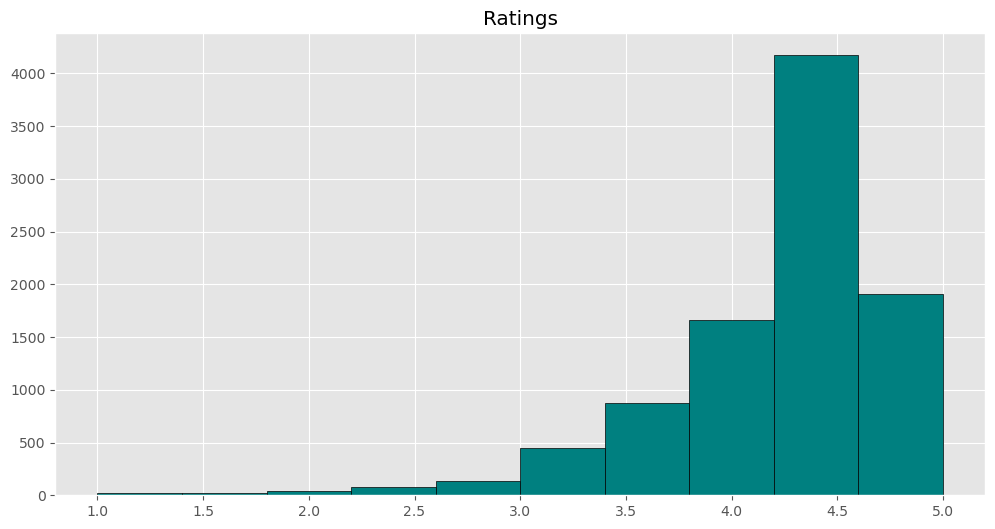

In [20]:
plt.figure(figsize = (12,6))
plt.hist(playstore.Rating,color='teal',edgecolor='black')
plt.title("Ratings")
plt.show()

> A histogram of size

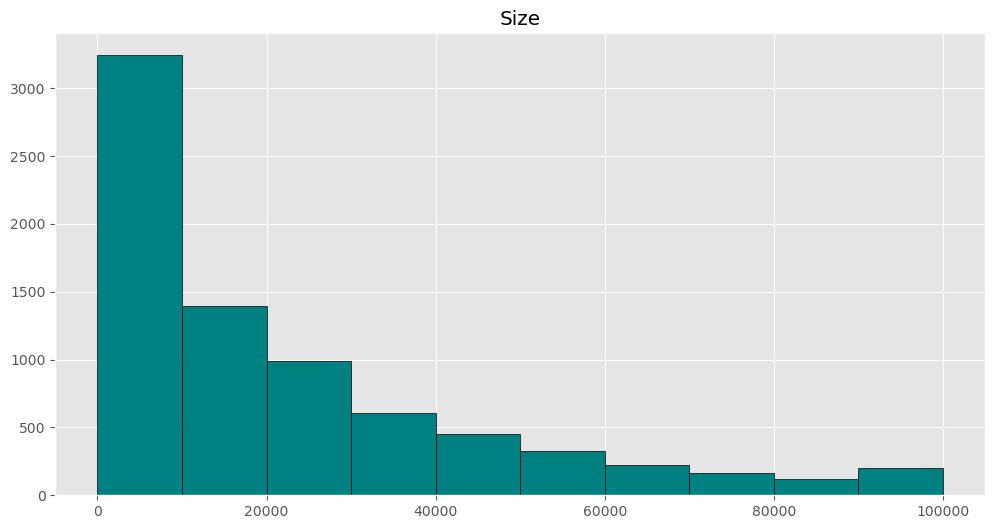

In [21]:
plt.figure(figsize = (12,6))
plt.hist(playstore.Size,color='teal',edgecolor='black')
plt.title("Size")
plt.show()

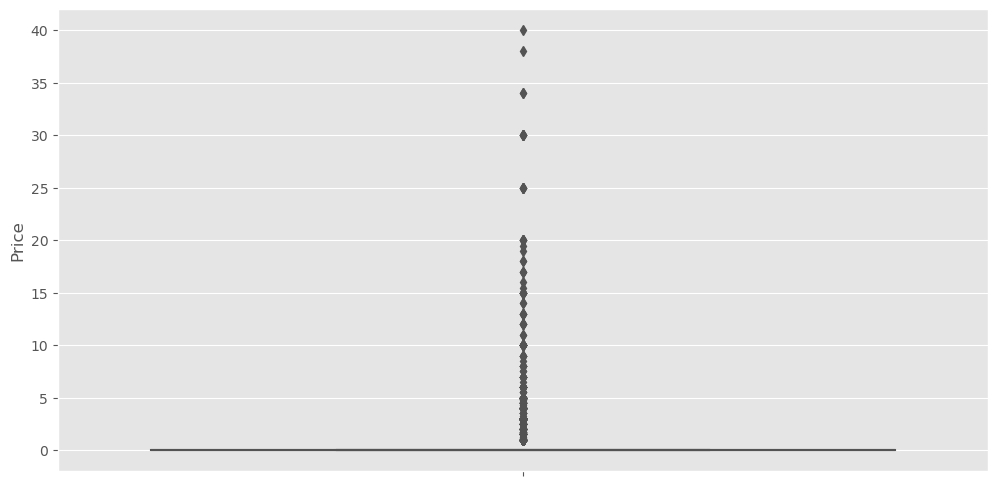

In [39]:
plt.figure(figsize = (12,6))
sns.boxplot(data=playstore,y='Price')
plt.show()

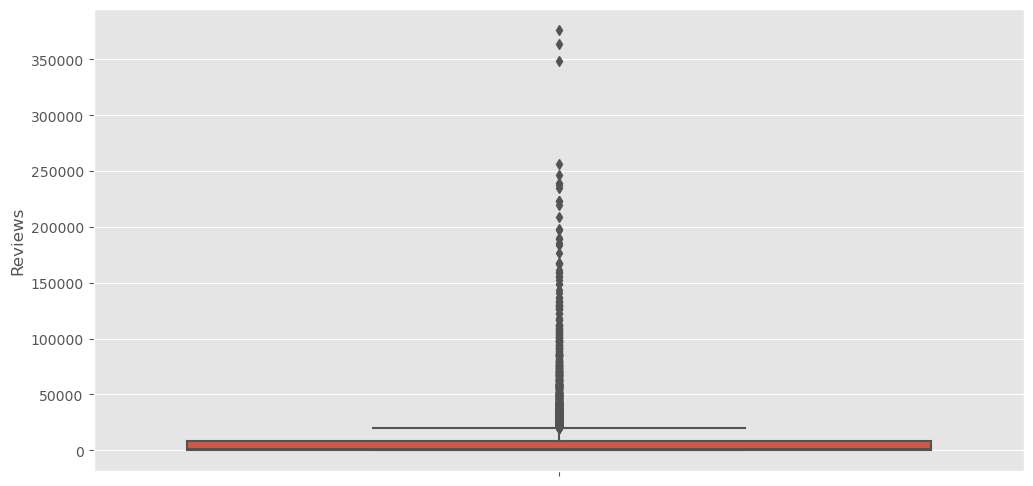

In [40]:
plt.figure(figsize = (12,6))
sns.boxplot(data=playstore,y='Reviews')
plt.show()

### Treatment for Outliers

- > Remove rows with very high prices
- > Remove apps with very few reviews
- > Remove outliers from the install column

In [30]:
print("Apps with Prices greater than 50:" +str(len(playstore[playstore.Price>50])))

playstore = playstore[playstore.Price < 50].copy()

print("There are " + str(playstore.shape[0])+ " Rows" + " ," + str(playstore.shape[-1]) +" Columns in the data." )

Apps with Prices greater than 50:0
There are 9334 Rows ,13 Columns in the data


In [32]:
print("Apps with more than a million reviews:" +str(len(playstore[playstore.Reviews>=1000000])))

playstore = playstore[playstore.Reviews <= 1000000].copy()

print("There are " + str(playstore.shape[0])+ " Rows" + " ," + str(playstore.shape[-1]) +" Columns in the data." )

Apps with more than a million reviews:704
There are 8630 Rows ,13 Columns in the data.


In [35]:
print(playstore.Installs.quantile([.25,.50,.75,.90,.99]))

print("Apps with more than a million installs:" +str(len(playstore[playstore.Installs>=1000000])))

playstore = playstore[playstore.Installs <= 1000000].copy()

print("There are " + str(playstore.shape[0])+ " Rows" + " ," + str(playstore.shape[-1]) +" Columns in the data." )

0.25       5000.0
0.50     100000.0
0.75     500000.0
0.90    1000000.0
0.99    1000000.0
Name: Installs, dtype: float64
Apps with more than a million installs:1576
There are 6502 Rows ,13 Columns in the data.


#### Scatter plot of Ratings vs Price

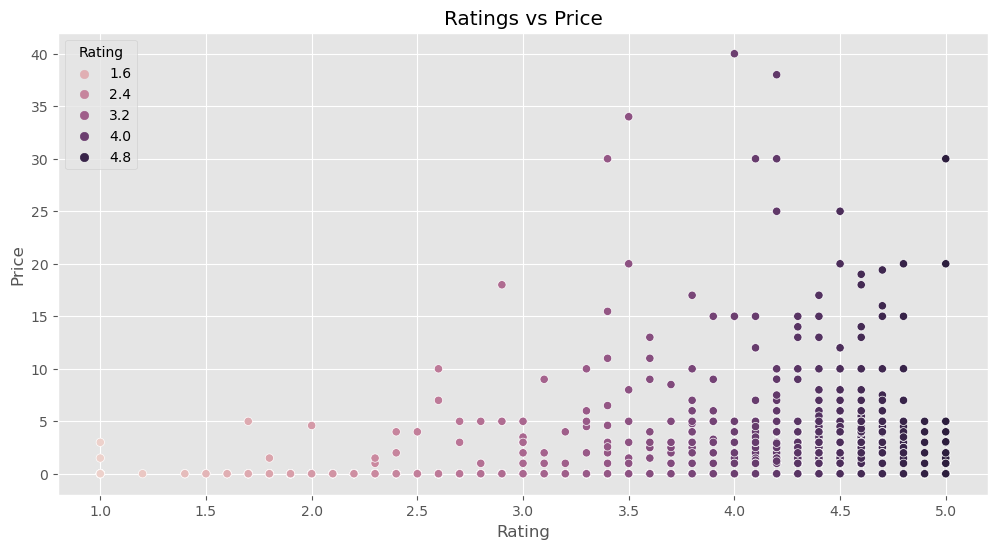

In [44]:
plt.figure(figsize=(12,6))
plt.title('Ratings vs Price')
sns.scatterplot(data=playstore,x='Rating',y='Price',hue='Rating')
plt.show()

> #### *Ratings increases as Price increases*

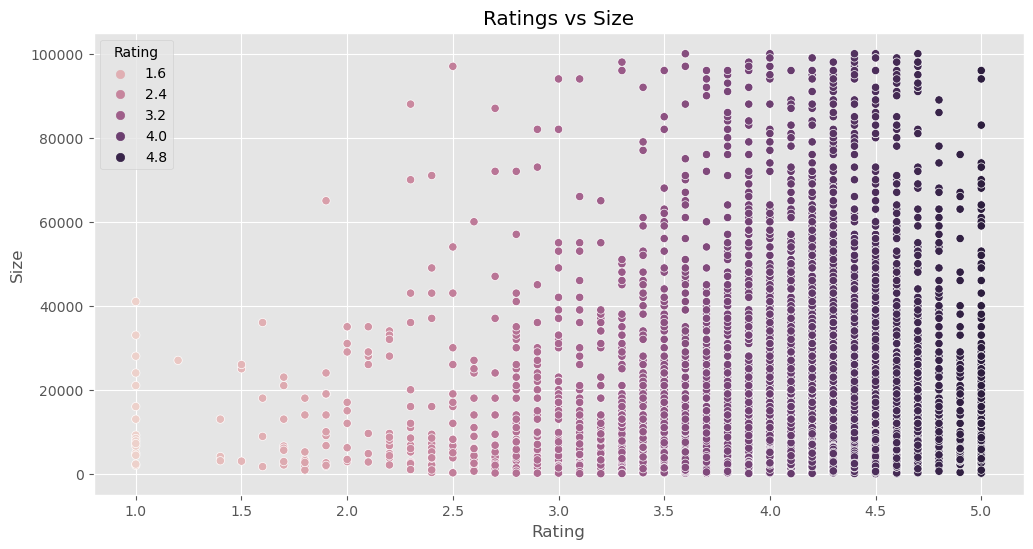

In [45]:
plt.figure(figsize=(12,6))
plt.title('Ratings vs Size')
sns.scatterplot(data=playstore,x='Rating',y='Size',hue='Rating')
plt.show()

> #### *Largers apps are rated better than smaller apps*

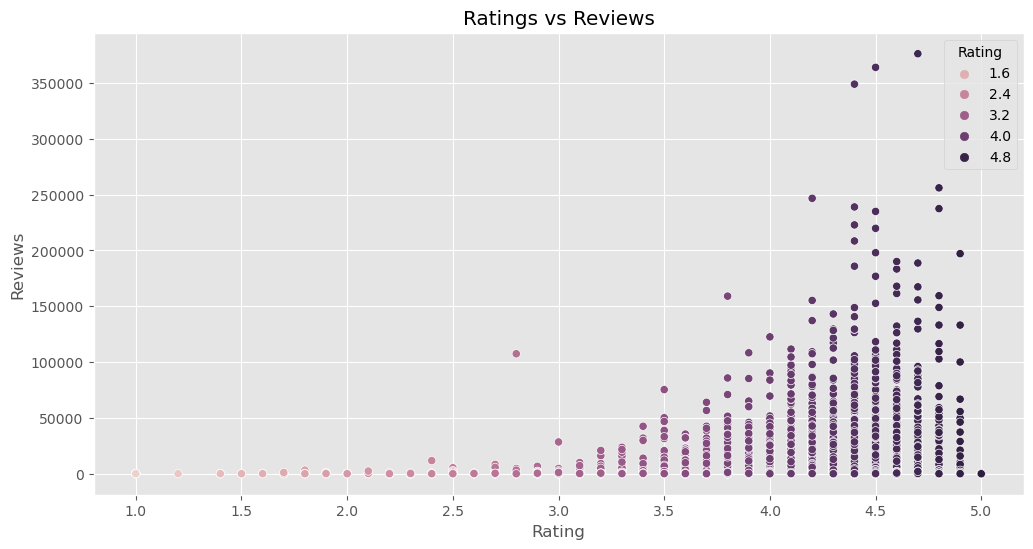

In [47]:
plt.figure(figsize=(12,6))
plt.title('Ratings vs Reviews')
sns.scatterplot(data=playstore,x='Rating',y='Reviews',hue='Rating')
plt.show()

> #### *Apps that are rated higher have more reviews.*

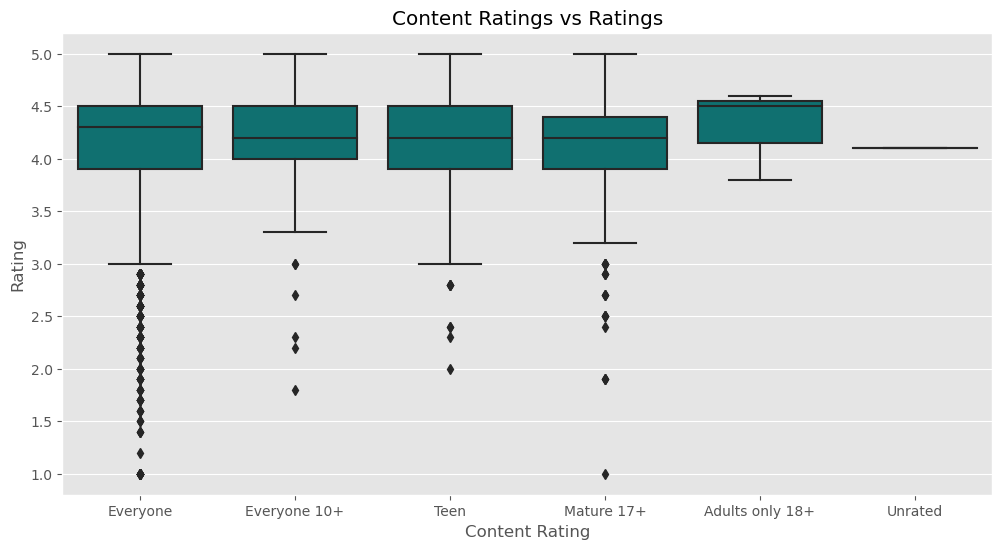

In [48]:
plt.figure(figsize=(12,6))
plt.title('Content Ratings vs Ratings')
sns.boxplot(data=playstore,x='Content Rating',y='Rating',color = 'teal')
plt.show()

> #### *Adult only apps are rated higher on average when compared with other categories.*

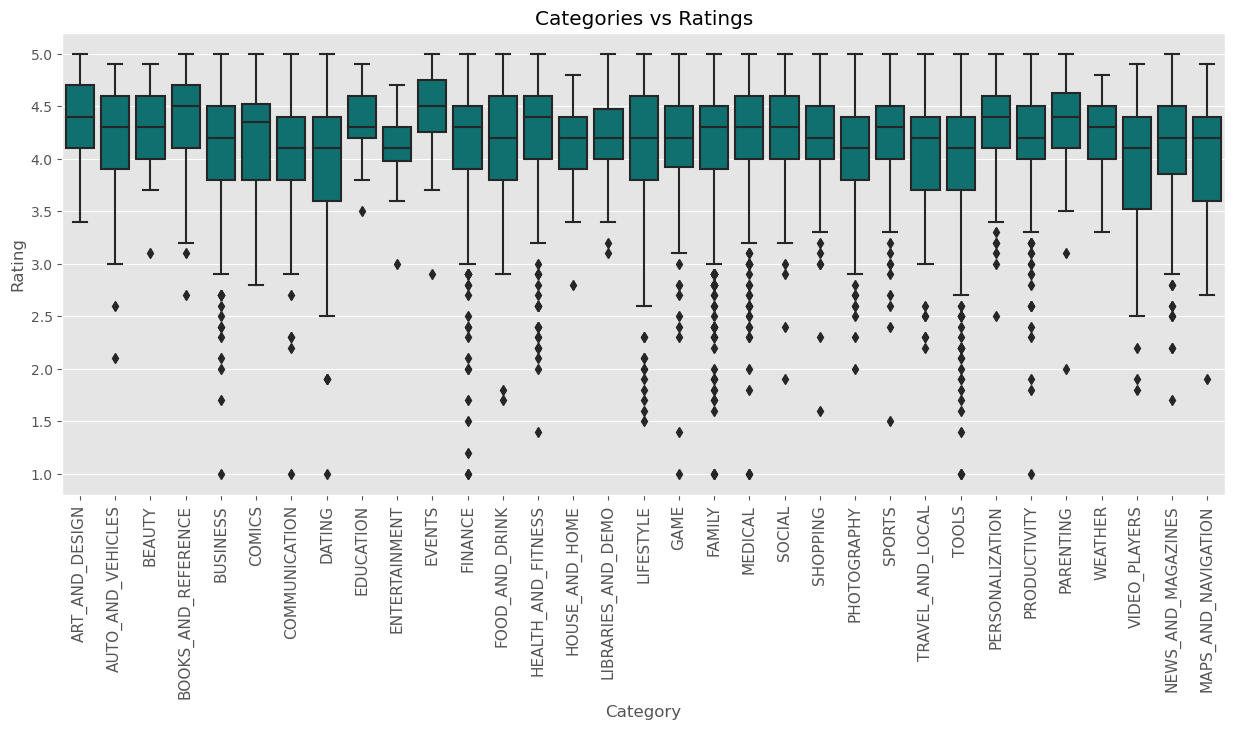

In [52]:
plt.figure(figsize=(15,6))
plt.title('Categories vs Ratings')
sns.boxplot(data=playstore,x='Category',y='Rating',color = 'teal')
plt.xticks(fontsize = 11,rotation = 'vertical')
plt.show()

> #### *Apps around books and references seem to have the highest median.*

# Machine Learning

## Data Preprocessing
- Create a copy of the data and use the copy for machine learning
- Apply log transformation to the Installs and Review columns
- Drop unneccesary columns
- Train and Test the data
- Build a model

In [53]:
#create a copy of the dataframe
appdata = playstore.copy()

In [54]:
#applying log transformation to normalise the data
appdata.Installs = appdata.Installs.apply(func=np.log1p)
appdata.Reviews = appdata.Reviews.apply(func=np.log1p)

In [55]:
#Drop unneccessary columns
appdata.drop(columns = ['App','Last Updated','Type','Current Ver','Android Ver'],inplace = True)

appdata.head(1)

In [56]:
data = pd.get_dummies(appdata,columns=['Category','Genres','Content Rating'],drop_first = True)

In [57]:
data.dropna(inplace=True)

In [58]:
data

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,3.8,5.187386,19000.0,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,3.8,7.086738,582.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10833,4.8,3.806662,619.0,6.908755,0.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
10834,4.0,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Training and Testing the data

In [61]:
# define x and y 

X = data.iloc[:,1:]
y = data.Rating

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [66]:
# Predicting Test Data

predictions = model.predict(X_test)

** Create a scatter plot of the actual test values versus the predicted values**

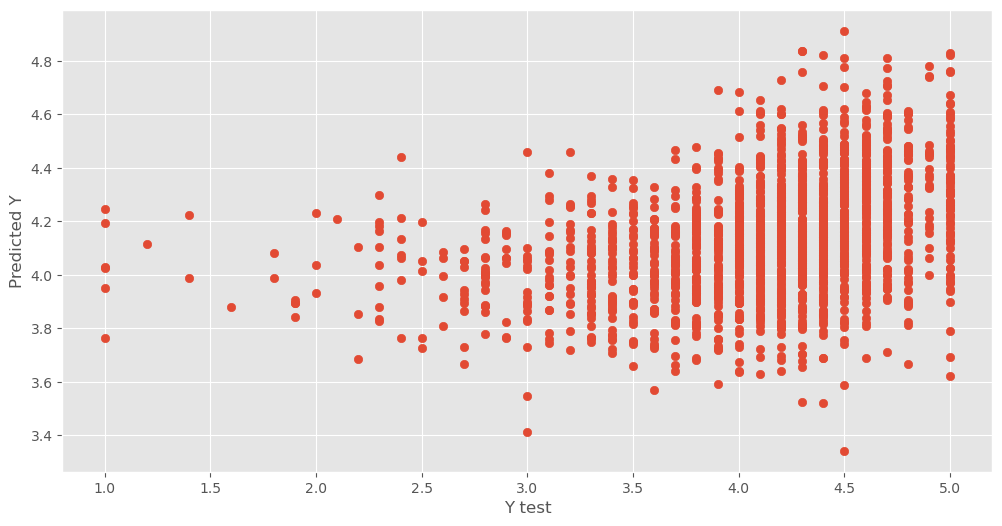

In [70]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()

In [71]:
# Evaluating the model

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3918649747763673
MSE: 0.3022807226510046
RMSE: 0.5498006208172237


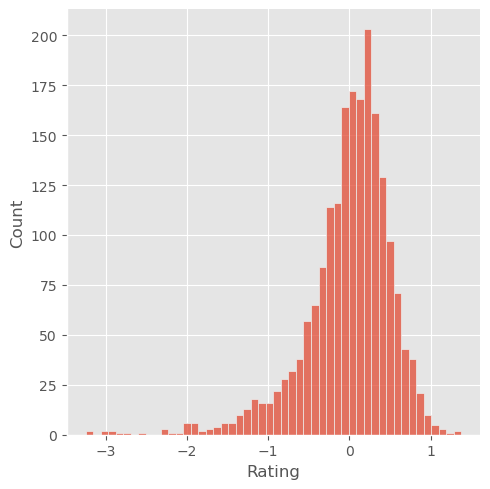

In [88]:
sns.displot((y_test-predictions),bins=50)

In [89]:
coefficients = pd.DataFrame(model.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
Reviews,1.694406e-01
Size,-7.030303e-07
Installs,-1.525712e-01
Price,-9.800944e-03
Category_AUTO_AND_VEHICLES,2.118821e-01
...,...
Content Rating_Everyone,-2.170855e-01
Content Rating_Everyone 10+,-2.281036e-01
Content Rating_Mature 17+,-1.952776e-01
Content Rating_Teen,-1.478190e-01
